# Hierarchical Bayes Model

## Problem

1.Fixed one imaginary plant biont, and we'd like to infere how many seeds the palnt biont will have.

2.This plant must have 10 ovules.

3.All ovules do not mean to be seeds.

4.Observing 100 this plant, we'd like to infere the change ratio from ovules to seeds.


## Modeling

Lets $y$ is the probability that ovules become seeds.
This probability can reporesent by using Binary distoribution ${\rm Bin}$ as following:

\begin{align}
p(y|q) &= {\rm Bin}(y|10,q)\\
{\rm Bin}(y|10,q) &= _{10}C_{y}q^{y}(1-q)^{10-y}
\end{align}

Here, q is the change ratio from ovules to seeds.
If all observation data is independent, the likehood function for observation data is :

\begin{align}
p(y_1,\cdots,y_{100} \mid q_1,\cdots,q_{100}) = \prod^{100}_{i = 1}p(y_{i}\mid q_{i})\ .
\end{align}

## Code Implimentation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pymc3 as pm
from scipy import stats
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Bayes_Modeling/Examples/data/d.csv')

The data is like following:

In [4]:
df

,plant.ID,y,alpha
0,1,0,-4.159582
1,2,0,-3.718362
2,3,0,-3.069020
3,4,0,-3.054211
4,5,0,-2.880656
5,6,2,-2.705595
6,7,1,-2.441703
7,8,1,-2.221327
8,9,0,-2.209120
9,10,1,-2.111941


In [0]:
#Extract y columns
y = df['y'].values

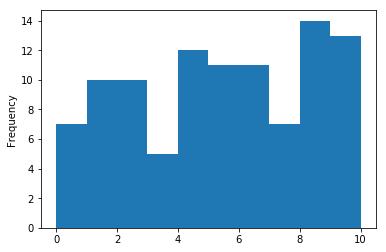

In [19]:
#See Y by histogram
df['y'].plot.hist()

## MAP inference

As the first analysis of above data, we once ignore the difference between each bionts.

These means that the likehood function become as following:

\begin{align}
p(y_1,\cdots,y_{100} \mid q) = \prod^{100}_{i = 1}p(y_{i}\mid q)\ .
\end{align}

The maximum likehood estimation for this likehood can be done by following code: 

In [19]:
#Map inference
model = pm.Model()
with model:
    q = pm.Uniform('q', lower = 0, upper = 1)#model variable that correspond to change ratio from ovule to seed
    y = pm.Binomial('y', n = 10, p = q, observed = y)#observed variables
    map_estimate = pm.find_MAP(model = model)
print(map_estimate['q'])

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -316.78, ||grad|| = 4: 100%|██████████| 5/5 [00:00<00:00, 382.76it/s]

0.4960000053023121


When we set model variable and observed variables for PyMC3 Model module, we must use 'with model' or `dist()`.

In [0]:
#Make binomial distribution from infered q
rv = stats.binom(10,map_estimate['q'])
binom_ys = [100 * rv.pmf(k) for k in range(11)]

## Prediction which considering difference between biont

We assume that the change probabilty from ovule to seed by the next sigmoid function:

\begin{align}
q_{i} = \dfrac{1}{1 + \exp(-(\beta + \alpha_{i}))}.
\end{align}

Here, $\beta$ is the varibale that isn't depend on each biont, and $\alpha_{i}$ is the varibale that is depend on each biont.

And asumming that these variables following next prob. distribution(**prior distribution**):

\begin{align}
p(\beta|\tau_{\beta}) &= \mathcal{N}\Big(\beta |0, \frac{1}{\tau_{\beta}}\Big)\\
p(\alpha_{i}|\tau_{\alpha}) &= \mathcal{N}\Big(\alpha_{i} |0, \frac{1}{\tau_{\alpha}}\Big)\\
\end{align}

Because $\beta$ isn't depend on individual diffenrence, here we set big variance($1/\tau_{\beta} = 100$).

And for prior distribution for $\tau_{\alpha}$, we set

\begin{align}
p(\tau_{\alpha}\mid a,b) &= {\rm Gamma}(\tau_{a}\mid a,b)\\
{\rm Gamma}(x\mid a,b) &:= \dfrac{b^{a}}{\Gamma(a)}x^{a - 1}\exp(-bx)\ .
\end{align}

This assumption for $\tau_{\alpha}$ means that the model parameter $\alpha_{i}$ has more deep probabilistic structure.
This type of probabilistic model is called that '**Hierarchical Bayes Model**'.

The posterior distribution $p(\alpha,\beta,\tau_{\alpha}|y)$ is calculated as following:

\begin{align}
p(\alpha,\beta,\tau_{\alpha}|y) = \dfrac{\prod^{100}_{i=1}p(y_{i}|\alpha_{i},\beta)p(\beta|\tau_{\beta})p(\alpha_{i}|\tau_{\alpha})p(\tau_{\alpha}|a,b)}{p(y)}
\end{align}

Here, 
\begin{align}
p(y) = \prod^{100}_{i=1}\int d\beta d\alpha_{i}d\tau_{\alpha}p(y_{i}|\alpha_{i},\beta)p(\beta|\tau_{\beta})p(\alpha_{i}|\tau_{\alpha})p(\tau_{\alpha}|a,b)
\end{align}

The implimentation of estimation for above model is written as following:

In [4]:
probabilistic_model = pm.Model()
with probabilistic_model:
    #Set variables
    beta = pm.Normal('beta', mu = 0, tau = 1.0e-2)
    tau = pm.Gamma('tau',alpha = 1.0e-02, beta=10e-02)
    alpha = pm.Normal('alpha', mu = 0, tau = tau, shape = len(df['y'].values))
    y_mean = pm.math.sigmoid(beta + alpha)
    y = pm.Binomial('y', n = 10, p = y_mean, observed = df['y'])
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5000, start = start, step=step)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -161.01, ||grad|| = 0.026637: 100%|██████████| 34/34 [00:00<00:00, 1018.74it/s] 
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, tau, beta]
100%|██████████| 5500/5500 [00:22<00:00, 248.10it/s]


`pm.NUTS()`:**No-U-Turn** sampler
(http://jmlr.org/papers/volume15/hoffman14a/hoffman14a.pdf)

Using `.gelman_rubin` method of PyMC3, we can easily check the Gelman_Rubin statistic.

From the experience, if Gelman_Rubin statistic is less than 1.1, the convergence is no problem.

In [12]:
#Chack Convergence
pm.gelman_rubin(trace)

{'alpha': array([0.99990022, 0.99999403, 0.99994695, 0.99998467, 0.99990009,
        1.0000488 , 0.999905  , 0.99993064, 1.00008394, 0.99999192,
        0.9999496 , 0.99993905, 0.99995144, 1.00038429, 0.99990392,
        0.99996478, 0.99996397, 0.99990909, 0.99991001, 1.00003148,
        0.9999413 , 0.99990243, 0.99994062, 0.99994014, 0.99991629,
        0.99993034, 0.99990138, 0.99990265, 0.99991724, 0.9999002 ,
        0.99998332, 0.99990473, 0.99995782, 1.00000752, 0.9999314 ,
        1.00007181, 1.00006213, 1.0001123 , 0.99990788, 0.99990397,
        1.00031629, 1.00011583, 0.99990698, 1.00029329, 0.99990297,
        0.99991302, 0.99993225, 1.00003579, 1.00062708, 1.00009787,
        0.99991756, 0.99990505, 0.99997799, 0.99994236, 0.99992097,
        0.99992801, 0.99990238, 0.99994867, 0.99990017, 0.99992028,
        0.99993263, 0.9999002 , 1.0002077 , 0.99996906, 1.00025813,
        0.9999    , 0.9999    , 0.99990056, 0.9999747 , 0.99991257,
        1.00011089, 0.99991108, 0.99990

## Posterior Distribution Calculation

In previous section, we calculated the posterior distribution.

Using this posterior distribution, we can get sampling from the predicted distribution as following:

\begin{align}
p(y^{*}\mid y) &=\int d\beta d\alpha d\tau_{\alpha} \ p(\alpha,\beta,\tau_{\alpha}\mid y)p(y^{*}\mid \beta,\alpha)\\
&\sim \dfrac{1}{M}\sum_{(\alpha,\beta,\tau_{\alpha})\sim p(\alpha,\beta,\tau_{\alpha}\mid y)}p(y^{*}\mid \beta,\alpha)
\end{align}

In [7]:
#Set total sample size
sample_size, _ = trace['alpha'].shape
posterior = pm.sample_posterior_predictive(trace,sample_size,model = probabilistic_model)
y_predicted = posterior['y']

100%|██████████| 10000/10000 [00:06<00:00, 1446.79it/s]


In [0]:
#Make histogram
bins = 11
pred_y = np.empty((sample_size,bins))
for i, k in enumerate(y_predicted):
    pred_y[i] = np.histogram(k,bins)[0]

#Calc mean
pred_y_mean = pred_y.mean(axis = 0)
#Calc std
pred_y_std = pred_y.std(axis = 0)

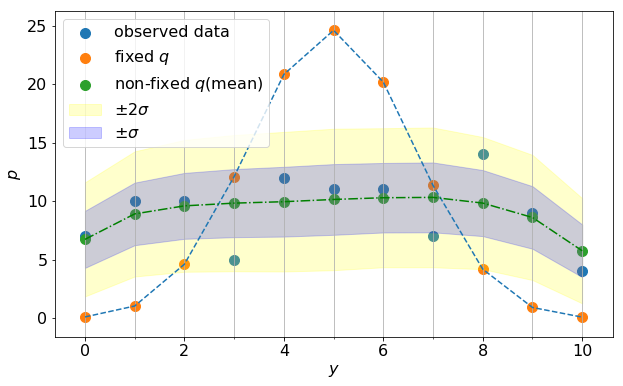

In [25]:
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = 16
xs = np.arange(11)
histo_ys = np.histogram(df['y'].values, bins = bins)[0]
plt.scatter(xs, histo_ys, s=100, label='observed data')
 
plt.plot(xs, binom_ys, ls='--')
plt.scatter(xs, binom_ys, s=100, label='fixed $q$')
 
plt.xlabel('$y$')
plt.ylabel('$p$')
 
plt.plot(xs, pred_y_mean, ls='-.', c='g')
plt.scatter(xs, pred_y_mean, s=100, label='non-fixed $q$(mean)')
 
plt.fill_between(xs, pred_y_mean - 2*pred_y_std, pred_y_mean + 2*pred_y_std, color='yellow', alpha=0.2, label='$\pm2\sigma$')
plt.fill_between(xs, pred_y_mean - pred_y_std, pred_y_mean + pred_y_std, color='blue', alpha=0.2, label='$\pm\sigma$')
 
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid(which='minor')
plt.legend(loc='upper left')
plt.show()